# Visualizations of COVID data by region
### Might do predictions/regressions later idk


In [170]:
#%%debug
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np 
import pandas as pd
from glob import glob

In [171]:

"""
dates = []

path = "./csse_covid_19_data/csse_covid_19_daily_reports"
daily_files = glob(path + "/*.csv")

#print(daily_files)

for filename in daily_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    # TODO: fillna on missing cities, remove diamond princess on US
    dates.append(df)
    
#frame = pd.concat(li, axis=0, ignore_index=True)

#import ipdb; ipdb.set_trace()

# Dates start at 0 (01-22-2020)
start_date = 20
common = set(dates[start_date]['Country_Region'])
for date in dates[21:]:
    common = common.intersection(set(date['Country_Region']))
print(common)
"""

'\ndates = []\n\npath = "./csse_covid_19_data/csse_covid_19_daily_reports"\ndaily_files = glob(path + "/*.csv")\n\n#print(daily_files)\n\nfor filename in daily_files:\n    df = pd.read_csv(filename, index_col=None, header=0)\n    # TODO: fillna on missing cities, remove diamond princess on US\n    dates.append(df)\n    \n#frame = pd.concat(li, axis=0, ignore_index=True)\n\n#import ipdb; ipdb.set_trace()\n\n# Dates start at 0 (01-22-2020)\nstart_date = 20\ncommon = set(dates[start_date][\'Country_Region\'])\nfor date in dates[21:]:\n    common = common.intersection(set(date[\'Country_Region\']))\nprint(common)\n'

In [172]:
path_cases = "./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
cases_df = pd.read_csv(path_cases, header=0)

path_recovered = "./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
recovered_df = pd.read_csv(path_recovered, header=0)

cases_df.set_index(["Province/State", "Country/Region", "Lat", "Long"])
recovered_df.set_index(["Province/State", "Country/Region", "Lat", "Long"])


dates = cases_df.columns[32:-1]
print(cases_df[dates])
cases_df[dates] = cases_df[dates].sub(recovered_df[dates])

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0         35       35       35       35       35       35       37       40   
1         84       94      105      122      147      159      170      189   
2         84       84       85       85       89       89       91       93   
3          1        1        1        1        1        1        1        1   
4         22       22       22       22       22       22       22       22   
..       ...      ...      ...      ...      ...      ...      ...      ...   
496        0        0        0        0        0        0        0        0   
497        0        0        0        0        0        0        0        0   
498        0        0        0        0        0        0        0        0   
499        0        0        0        0        0        0        0        0   
500        0        0        0        0        0        0        0        0   

     2/27/20  2/28/20  ...  3/13/20  3/14/20  3/15/

In [176]:

#for region in regions:
#    cases_df.loc[lambda c: cases_df['Province/State'] == region, dates]

# Drop regions with <= 10 cases
#cases_df = cases_df[~(cases_df['3/20/20'] <= 50)] 
# Get 20 largest
cases_df = cases_df.nlargest(15, '3/20/20')

# Fill in any missing Province/State with country
cases_df["Province/State"].fillna(cases_df["Country/Region"], inplace=True) 

print(cases_df.head(50))

     Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
16            Italy           Italy  43.0000   12.0000        0        0   
11          Germany         Germany  51.0000    9.0000        0        0   
18            Spain           Spain  40.0000   -4.0000        0        0   
155            Iran            Iran  32.0000   53.0000        0        0   
157          France          France  46.2276    2.2137        0        0   
154           Hubei           China  30.9756  112.2707      444      444   
99         New York              US  42.1657  -74.9481        0        0   
156    Korea, South    Korea, South  36.0000  128.0000        1        1   
31      Switzerland     Switzerland  46.8182    8.2275        0        0   
403  United Kingdom  United Kingdom  55.3781   -3.4360        0        0   
440     Netherlands     Netherlands  52.1326    5.2913        0        0   
32          Austria         Austria  47.5162   14.5501        0        0   
20          

In [177]:
cases_df.shape

(15, 66)

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
16         3        3       20       61      153      228      321      450   
11         4        4        2        2        2        2        3       12   
18         0        0        0        0        0        0        4       11   
155        2        5       18       28       43       61       95       90   
157        8        8        8        8        8        8        3        7   
154    51694    50654    50781    48785    48741    47539    45815    44218   
99         0        0        0        0        0        0        0        0   
156       19       88      188      417      584      815      955     1239   
31         0        0        0        0        0        0        1        1   
403        1        1        1        1        1        5        5        5   
440        0        0        0        0        0        0        0        0   
32         0        0        0        0        0    

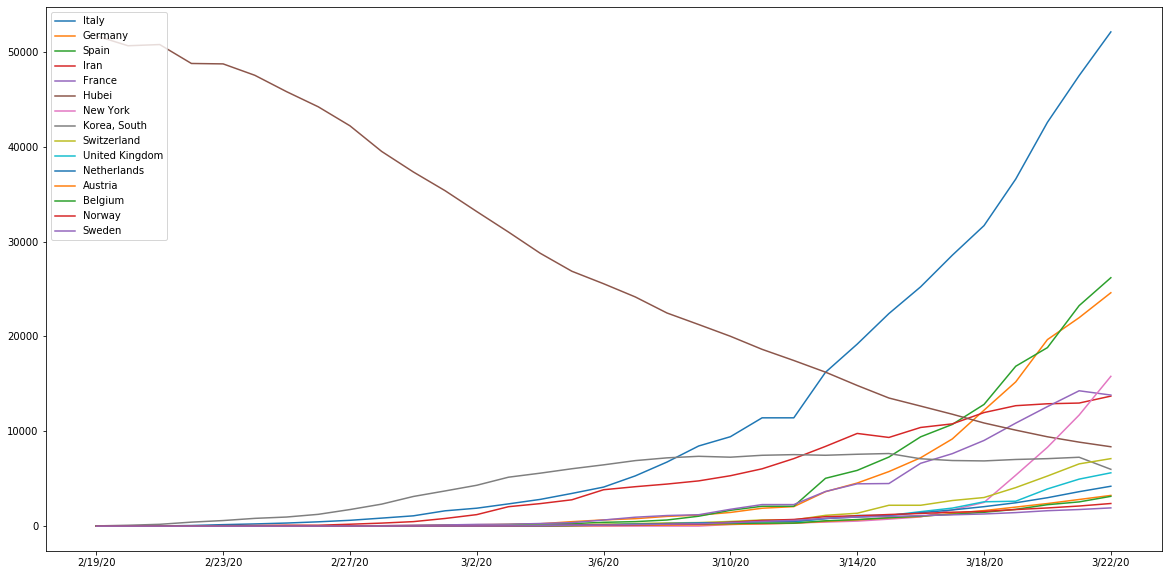

In [189]:

print(cases_df[dates].head(30))

def plot_place(df, column, dates):
    fig, ax = plt.subplots(figsize=(20, 10)) 
    for region in df[column]:
        region_data = df.loc[lambda c: df[column] == region, dates]
        ax.plot(dates, 
                region_data.transpose(),
                label=region)
        loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)
    
plot_place(cases_df, "Province/State", dates)

loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set(xlabel='Date', ylabel='Confirmed cases (- recovered)')
plt.legend(loc="upper left")
fig.savefig("Countries.png")
plt.show()

KeyError: 'Country/Region'

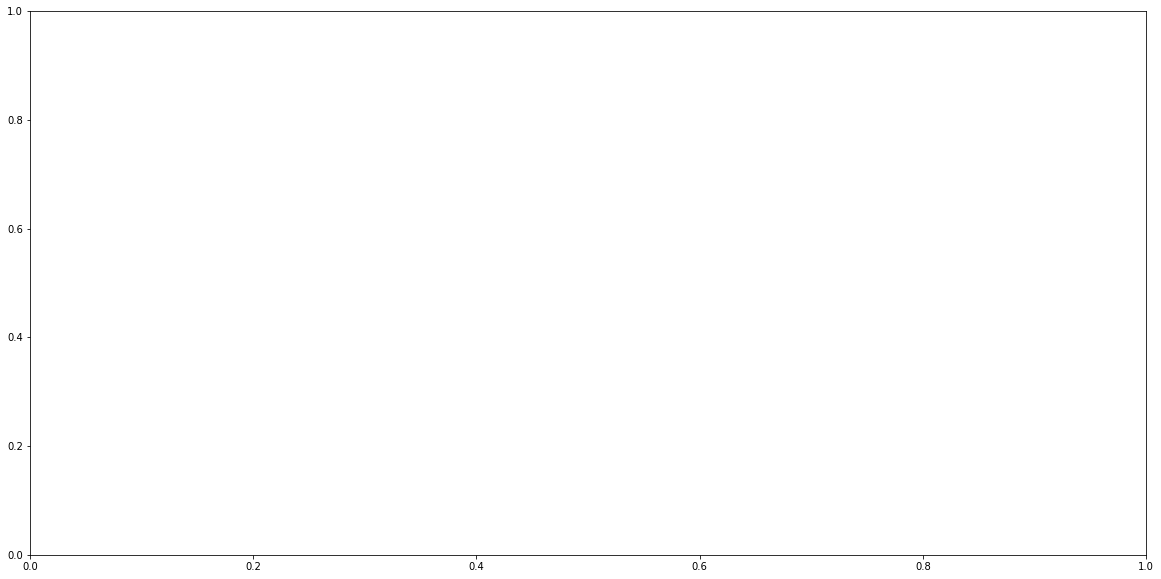

In [194]:
countries_df = cases_df.groupby('Country/Region').sum()#.aggregate(np.sum)
countries_df.head()
plot_place(countries_df, 'Country/Region', dates)


loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set(xlabel='Date', ylabel='Confirmed cases (- recovered)')
plt.legend(loc="upper left")
fig.savefig("Countries.png")
plt.show()